In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
#loading data

train_data=pd.read_csv('/content/train.csv')
test_data=pd.read_csv('/content/test.csv')


In [53]:
train_data

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,...,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,...,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,...,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,...,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0


In [54]:
test_data

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,...,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,...,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,...,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,...,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,...,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28908,11537800,35000,35000,35000.000000,60,BAT5629144,16.240000,C,C5,MORTGAGE,...,0.000000,0.000000,0,INDIVIDUAL,109,0,0,883984,114000,NaN
28909,11538258,25000,25000,25000.000000,60,BAT5629144,14.980000,C,C3,MORTGAGE,...,0.000000,0.000000,0,INDIVIDUAL,104,0,0,513925,51800,NaN
28910,13147685,30000,30000,29950.000000,60,BAT2136391,18.240000,D,D5,MORTGAGE,...,0.000000,0.000000,1,INDIVIDUAL,83,0,0,296294,65600,NaN
28911,13917689,25000,25000,24950.000000,60,BAT2136391,15.610000,D,D1,MORTGAGE,...,0.000000,0.000000,0,INDIVIDUAL,83,0,0,428723,30400,NaN


In [55]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Batch Enrolled','Grade', 'Sub Grade', 'Employment Duration', 'Verification Status', 'Payment Plan', 'Loan Title','Initial List Status', 'Application Type']
LabelEncoder=LabelEncoder()
for cols in categorical_columns:
  train_data[cols] = LabelEncoder.fit_transform(train_data[cols])

In [56]:
train_data[cols]

0        0
1        0
2        0
3        0
4        0
        ..
67458    0
67459    0
67460    0
67461    0
67462    0
Name: Application Type, Length: 67463, dtype: int64

In [57]:
#feature engineering
train_data['TotalIncome'] = train_data['Loan Amount'] + train_data['Funded Amount'] + train_data['Funded Amount Investor']
train_data['Loan_Log'] = train_data['Loan Amount'].apply(lambda x: np.log(x) if x > 0 else 0)

In [58]:
import seaborn as sns

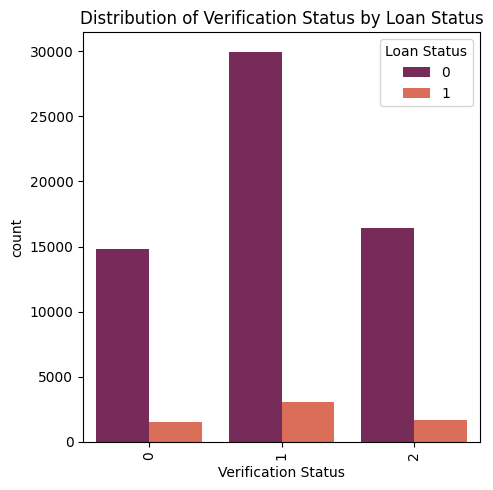

In [59]:
categorical_feature = 'Verification Status'  # Replace with the categorical feature you want to visualize

plt.figure(figsize=(5, 5))
sns.countplot(x=categorical_feature, hue='Loan Status', data=train_data, palette='rocket')
plt.title('Distribution of Verification Status by Loan Status')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [60]:
#training data model
x_train = train_data.drop(['Loan Status'], axis=1)
y_train = train_data['Loan Status']

In [61]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

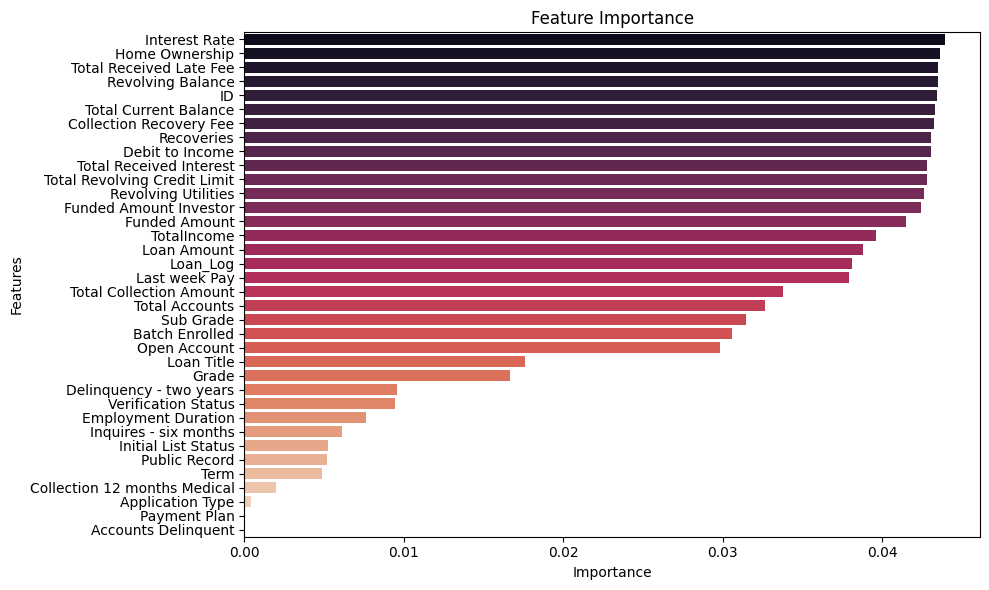

In [62]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = x_train.columns[sorted_idx]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=sorted_features, palette='rocket')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [63]:
#test data
categorical_columns = ['Batch Enrolled','Grade', 'Sub Grade', 'Employment Duration', 'Verification Status', 'Payment Plan', 'Loan Title','Initial List Status', 'Application Type']
#LabelEncoder=LabelEncoder()
for cols in categorical_columns:
  test_data[cols] = LabelEncoder.fit_transform(test_data[cols])

In [64]:
test_data['TotalIncome'] = test_data['Loan Amount'] + test_data['Funded Amount'] + test_data['Funded Amount Investor']
test_data['Loan_Log'] = test_data['Loan Amount'].apply(lambda x: np.log(x) if x > 0 else 0)

In [65]:
x_test = test_data.drop(['Loan Status'], axis=1)
y_test = test_data['Loan Status']

In [66]:
x_test

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,TotalIncome,Loan_Log
0,56492997,17120,10365,16025.082690,59,18,12.163926,0,15,2,...,0.731797,0,0,135,0,24,475442,4364,43510.082690,9.748003
1,22540813,7133,11650,12615.795600,59,20,6.564296,1,22,0,...,0.992918,0,0,56,0,1,72412,2573,31398.795600,8.872487
2,9862181,25291,25825,11621.280830,59,5,14.729900,0,12,0,...,0.281580,0,0,3,0,26,284825,19676,62737.280830,10.138204
3,10097822,30781,9664,15375.823510,59,32,10.523767,0,1,2,...,0.959162,0,0,21,0,32,40842,7226,55820.823510,10.334653
4,47771809,8878,9419,7176.647582,58,29,9.997013,2,7,1,...,0.402315,0,0,104,0,33,90825,26145,25473.647582,9.091332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28908,11537800,35000,35000,35000.000000,60,36,16.240000,2,14,0,...,0.000000,0,0,109,0,0,883984,114000,105000.000000,10.463103
28909,11538258,25000,25000,25000.000000,60,36,14.980000,2,12,0,...,0.000000,0,0,104,0,0,513925,51800,75000.000000,10.126631
28910,13147685,30000,30000,29950.000000,60,11,18.240000,3,19,0,...,0.000000,1,0,83,0,0,296294,65600,89950.000000,10.308953
28911,13917689,25000,25000,24950.000000,60,11,15.610000,3,15,0,...,0.000000,0,0,83,0,0,428723,30400,74950.000000,10.126631


In [67]:
y_test

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
28908   NaN
28909   NaN
28910   NaN
28911   NaN
28912   NaN
Name: Loan Status, Length: 28913, dtype: float64

In [68]:
#prediction
y_prediction = model.predict(x_test)

In [69]:
y_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
pd.DataFrame(y_prediction)

,0
0,0
1,0
2,0
3,0
4,0
...,...
28908,0
28909,0
28910,0
28911,0


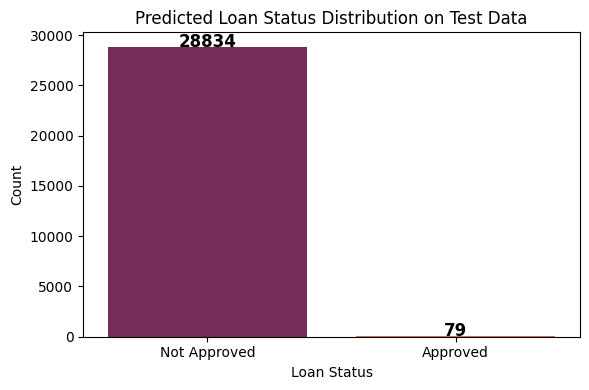

    Loan Status  Count
0      Approved     79
1  Not Approved  28834


In [71]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_prediction, palette='rocket')
plt.title('Predicted Loan Status Distribution on Test Data')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks([1, 0], ['Approved', 'Not Approved'])
#plt.tight_layout()
#plt.show()

for index, value in enumerate(np.bincount(y_prediction)):
    plt.text(index, value + 3, str(value), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

pcounts = pd.Series(y_prediction).value_counts()
pcounts_table = pd.DataFrame({'Loan Status': ['Approved', 'Not Approved'],
                                      'Count': [pcounts[1], pcounts[0]]})
print(pcounts_table)

In [72]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, roc_curve, auc
y_cv_prediction = cross_val_predict(model, x_train, y_train, cv=5, n_jobs=-1)

In [73]:
y_cv_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
conf_matrix = confusion_matrix(y_train, y_cv_prediction)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[61222     0]
 [ 6241     0]]


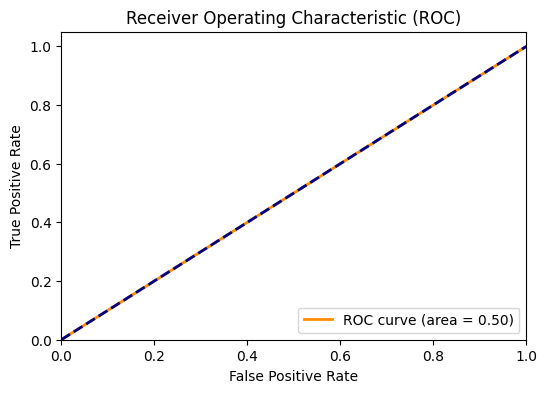

Confusion Matrix:
 [[61222     0]
 [ 6241     0]]


In [75]:
# ROC Curve and AUC Calculation
fpr, tpr, thresholds = roc_curve(y_train, y_cv_prediction)
roc_auc = auc(fpr, tpr)

# Display ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Display Confusion Matrix
conf_matrix = confusion_matrix(y_train, y_cv_prediction.round())
print("Confusion Matrix:\n", conf_matrix)